In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

!pip install emoji

import emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 9.8 MB/s eta 0:00:00


# Data Loading

In [ ]:
# load dataset
df = pd.read_csv('GooglePlay_Data.csv')

# Data Exploration

In [ ]:
# First 10 rows of the dataset
df.head()

,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,81942ead-9d65-4b1a-8aa2-6e21ad5cf5e7,Vernalee Fortin,NaN,"Still loving it!, the best!",5,0,9/3/2024 0:23,NaN,NaN,23.12.04000,en,us
1,c08cf1e7-45e4-43a3-b86f-51f7809b80a3,Toki Doki,NaN,Convenient one stop app for all your passwords...,5,0,8/19/2024 3:32,NaN,NaN,23.12.04000,en,us
2,c8937763-e1b4-43b1-9e48-cde58be80111,CJ Cross,NaN,Tried several password managers until I came a...,5,0,7/30/2024 8:07,NaN,NaN,23.12.04000,en,us
3,762baf4b-9109-4b4b-a42f-2291b0486faf,Trevor Lewis,NaN,Ok thank you,5,0,6/11/2024 17:20,NaN,NaN,NaN,en,us
4,275a2d36-6d77-44ae-9d7b-8be6ad614e3f,K K,NaN,switched phones and none of my passwords came ...,1,0,5/19/2024 19:20,You have to do a backup on Google Drive / Drop...,5/21/2024 23:50,23.12.04000,en,us


In [ ]:
# Last 10 rows of the dataset
df.tail()

,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
156,518e0b64-dcfe-4862-814f-319ac079b68e,A Google user,NaN,Simple but effective,5,0,9/12/2016 22:01,NaN,NaN,4,en,us
157,5dcd42c0-64a0-4c1c-9d30-0d90845a3705,A Google user,NaN,I like the recognizable icons for identifying ...,4,0,9/10/2016 0:49,NaN,NaN,4,en,us
158,ab0b106b-cacb-4e54-9ab8-63cba5d15574,A Google user,NaN,Colorful and pleasing to the eye. Very simple...,5,5,9/4/2016 5:09,NaN,NaN,4,en,us
159,1094d763-3d6a-4d53-9ceb-219627306efe,A Google user,NaN,Love it,5,1,9/1/2016 20:45,NaN,NaN,4,en,us
160,b454b56c-6171-49bb-a04b-b878095b83e2,A Google user,NaN,Awesome,5,1,8/31/2016 6:53,NaN,NaN,NaN,en,us


In [ ]:
# Check information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   review_id                161 non-null    object 
 1   user_name                161 non-null    object 
 2   review_title             0 non-null      float64
 3   review_description       161 non-null    object 
 4   rating                   161 non-null    int64  
 5   thumbs_up                161 non-null    int64  
 6   review_date              161 non-null    object 
 7   developer_response       50 non-null     object 
 8   developer_response_date  50 non-null     object 
 9   appVersion               146 non-null    object 
 10  laguage_code             161 non-null    object 
 11  country_code             161 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 15.2+ KB


In [ ]:
# Describe the dataset
df.describe()

,review_title,rating,thumbs_up
count,0.0,161.000000,161.000000
mean,NaN,4.416149,1.950311
std,NaN,1.087193,3.692562
min,NaN,1.000000,0.000000
25%,NaN,4.000000,0.000000
50%,NaN,5.000000,1.000000
75%,NaN,5.000000,2.000000
max,NaN,5.000000,31.000000


In [ ]:
# Dayatypes of the dataset
df.dtypes

,0
review_id,object
user_name,object
review_title,float64
review_description,object
rating,int64
thumbs_up,int64
review_date,object
developer_response,object
developer_response_date,object
appVersion,object


## Data Wrangling

In [ ]:
# Standardizing the columns
# remove special characters and emojis from review column
df['review_description'] = df['review_description'].str.replace('[^a-zA-Z0-9\s]', '')

# Function to remove emojis using the emoji library
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

# Apply the function to the review_description column
df['review_description'] = df['review_description'].apply(remove_emojis)

In [ ]:
df.head()

,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,81942ead-9d65-4b1a-8aa2-6e21ad5cf5e7,Vernalee Fortin,NaN,"Still loving it!, the best!",5,0,9/3/2024 0:23,NaN,NaN,23.12.04000,en,us
1,c08cf1e7-45e4-43a3-b86f-51f7809b80a3,Toki Doki,NaN,Convenient one stop app for all your passwords...,5,0,8/19/2024 3:32,NaN,NaN,23.12.04000,en,us
2,c8937763-e1b4-43b1-9e48-cde58be80111,CJ Cross,NaN,Tried several password managers until I came a...,5,0,7/30/2024 8:07,NaN,NaN,23.12.04000,en,us
3,762baf4b-9109-4b4b-a42f-2291b0486faf,Trevor Lewis,NaN,Ok thank you,5,0,6/11/2024 17:20,NaN,NaN,NaN,en,us
4,275a2d36-6d77-44ae-9d7b-8be6ad614e3f,K K,NaN,switched phones and none of my passwords came ...,1,0,5/19/2024 19:20,You have to do a backup on Google Drive / Drop...,5/21/2024 23:50,23.12.04000,en,us


In [ ]:
# Converting reviews to lower case
df['review_description'] = df['review_description'].str.lower()

df.head()

,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,81942ead-9d65-4b1a-8aa2-6e21ad5cf5e7,Vernalee Fortin,NaN,"still loving it!, the best!",5,0,9/3/2024 0:23,NaN,NaN,23.12.04000,en,us
1,c08cf1e7-45e4-43a3-b86f-51f7809b80a3,Toki Doki,NaN,convenient one stop app for all your passwords...,5,0,8/19/2024 3:32,NaN,NaN,23.12.04000,en,us
2,c8937763-e1b4-43b1-9e48-cde58be80111,CJ Cross,NaN,tried several password managers until i came a...,5,0,7/30/2024 8:07,NaN,NaN,23.12.04000,en,us
3,762baf4b-9109-4b4b-a42f-2291b0486faf,Trevor Lewis,NaN,ok thank you,5,0,6/11/2024 17:20,NaN,NaN,NaN,en,us
4,275a2d36-6d77-44ae-9d7b-8be6ad614e3f,K K,NaN,switched phones and none of my passwords came ...,1,0,5/19/2024 19:20,You have to do a backup on Google Drive / Drop...,5/21/2024 23:50,23.12.04000,en,us


In [ ]:
# Removing duplicate reviews from dataset
df = df.drop_duplicates(subset='review_description', keep='first')

df.head()

,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,81942ead-9d65-4b1a-8aa2-6e21ad5cf5e7,Vernalee Fortin,NaN,"still loving it!, the best!",5,0,9/3/2024 0:23,NaN,NaN,23.12.04000,en,us
1,c08cf1e7-45e4-43a3-b86f-51f7809b80a3,Toki Doki,NaN,convenient one stop app for all your passwords...,5,0,8/19/2024 3:32,NaN,NaN,23.12.04000,en,us
2,c8937763-e1b4-43b1-9e48-cde58be80111,CJ Cross,NaN,tried several password managers until i came a...,5,0,7/30/2024 8:07,NaN,NaN,23.12.04000,en,us
3,762baf4b-9109-4b4b-a42f-2291b0486faf,Trevor Lewis,NaN,ok thank you,5,0,6/11/2024 17:20,NaN,NaN,NaN,en,us
4,275a2d36-6d77-44ae-9d7b-8be6ad614e3f,K K,NaN,switched phones and none of my passwords came ...,1,0,5/19/2024 19:20,You have to do a backup on Google Drive / Drop...,5/21/2024 23:50,23.12.04000,en,us


In [ ]:
# Since review title has null values in all rows, we can drop the column
df = df.drop('review_title', axis=1)

In [ ]:
df.head()

,review_id,user_name,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,81942ead-9d65-4b1a-8aa2-6e21ad5cf5e7,Vernalee Fortin,"still loving it!, the best!",5,0,9/3/2024 0:23,NaN,NaN,23.12.04000,en,us
1,c08cf1e7-45e4-43a3-b86f-51f7809b80a3,Toki Doki,convenient one stop app for all your passwords...,5,0,8/19/2024 3:32,NaN,NaN,23.12.04000,en,us
2,c8937763-e1b4-43b1-9e48-cde58be80111,CJ Cross,tried several password managers until i came a...,5,0,7/30/2024 8:07,NaN,NaN,23.12.04000,en,us
3,762baf4b-9109-4b4b-a42f-2291b0486faf,Trevor Lewis,ok thank you,5,0,6/11/2024 17:20,NaN,NaN,NaN,en,us
4,275a2d36-6d77-44ae-9d7b-8be6ad614e3f,K K,switched phones and none of my passwords came ...,1,0,5/19/2024 19:20,You have to do a backup on Google Drive / Drop...,5/21/2024 23:50,23.12.04000,en,us


# Checking and removing or imputing Null or missing values

In [ ]:
# Sum of null values in each column
df.isnull().sum()

,0
review_id,0
user_name,0
review_description,0
rating,0
thumbs_up,0
review_date,0
developer_response,100
developer_response_date,100
appVersion,14
laguage_code,0


In [ ]:
df = df.drop('user_name', axis=1)
df = df.drop('review_date', axis=1)
df = df.drop('developer_response', axis=1)
df = df.drop('developer_response_date', axis=1)
df = df.drop('laguage_code', axis=1)
df = df.drop('country_code', axis=1)

In [ ]:
df['review_id'] = range(1, len(df) + 1)

In [ ]:
df.head()

,review_id,review_description,rating,thumbs_up,appVersion
0,1,"still loving it!, the best!",5,0,23.12.04000
1,2,convenient one stop app for all your passwords...,5,0,23.12.04000
2,3,tried several password managers until i came a...,5,0,23.12.04000
3,4,ok thank you,5,0,NaN
4,5,switched phones and none of my passwords came ...,1,0,23.12.04000


In [ ]:
# count of every category in appVersion column
df['appVersion'].value_counts()

,count
appVersion,
18.0.0,41
16.0.2,19
17.0.0,14
23.12.04000,10
23.02.25000,9
4,9
22.11.23001,6
7.1.1,5
7.0.0,5


In [ ]:
# Fill missing values in developer_response and developer_response_date with "No response"
#df['developer_response'].fillna('No response', inplace=True)
#df['developer_response_date'].fillna('No response date', inplace=True)

# Fill missing values in appVersion with the mode
df['appVersion'].fillna(df['appVersion'].mode()[0], inplace=True)

print(df.isnull().sum())

review_id             0
review_description    0
rating                0
thumbs_up             0
appVersion            0
dtype: int64


<ipython-input-19-a813dfb68637>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['appVersion'].fillna(df['appVersion'].mode()[0], inplace=True)


In [ ]:
# Removing duplicates from dataset
df = df.drop_duplicates()

In [ ]:
# Apply IQR method to remove outliers from the 'thumbs_up' column and print them
Q1 = df['thumbs_up'].quantile(0.25)
Q3 = df['thumbs_up'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['thumbs_up'] >= lower_bound) & (df['thumbs_up'] <= upper_bound)]
df_outliers = df[(df['thumbs_up'] < lower_bound) | (df['thumbs_up'] > upper_bound)]
#df=df_cleaned
df_outliers

,review_id,review_description,rating,thumbs_up,appVersion
18,18,"i've been using this app for years, and i abso...",5,9,23.02.25000
31,31,the initial problem of downloading my backup h...,3,10,22.12.24000
49,47,saves my all password with just 1 password. i'...,5,6,18.0.0
53,50,warning do not install. if you ever want to ch...,1,19,18.0.0
54,51,"hi wont restore from my google drive says "" pa...",1,7,18.0.0
59,55,i'm having problem to backup all passwords to ...,4,31,18.0.0
67,63,this app has been a life saver. having so many...,4,7,18.0.0
84,78,secure . works perfectly. i was able to recove...,5,11,18.0.0
86,80,very good app. i just need to know what happen...,4,14,18.0.0
89,83,easy to use. previously i was able to restore ...,5,15,18.0.0


In [ ]:
# # Calculate Q1, Q3, and IQR for and 'thumbs_up'
#Q1 = df['thumbs_up'].quantile(0.25)
#Q3 = df['thumbs_up'].quantile(0.75)
#IQR = Q3 - Q1

# Filter out the outliers
#df = df[~((df['thumbs_up'] < (Q1 - 1.5 * IQR)) | (df['thumbs_up'] > (Q3 + 1.5 * IQR)))]

# Data Transformation

In [ ]:
# Converting columns to correct datatypes
#df['review_date'] = pd.to_datetime(df['review_date'])

# Fill missing values with NaT instead of 'No response date'
#df['developer_response_date'] = df['developer_response_date'].replace('No response date', pd.NaT)

# Convert the column to datetime format
#df['developer_response_date'] = pd.to_datetime(df['developer_response_date'], errors='coerce')

#df.dtypes

In [ ]:

#df['developer_response_date'] = df['developer_response_date'].replace(pd.NaT,'No response date')
#df['developer_response_date'].head()

In [ ]:
# Renaming laguage_code to language_code
#df = df.rename(columns={'laguage_code': 'language_code'})
#df.head()

In [ ]:
# Setting the threshold
threshold = 4

# Generate target variable
df['Customer_Satisfaction'] = df['rating'].apply(lambda x: 1 if x >= threshold else 0)

In [ ]:
# Apply label encoding for appVersion
label_encoder = LabelEncoder()
df['appVersion_encoded'] = label_encoder.fit_transform(df['appVersion'])

# Verify the encoded column
print(df[['appVersion', 'appVersion_encoded']].head(30))


     appVersion  appVersion_encoded
0   23.12.04000                  13
1   23.12.04000                  13
2   23.12.04000                  13
3        18.0.0                   6
4   23.12.04000                  13
5   23.12.04000                  13
6   23.12.04000                  13
7   23.12.04000                  13
8   23.12.04000                  13
9   23.12.04000                  13
10  23.12.04000                  13
11  23.09.15000                  12
12       18.0.0                   6
13       18.0.0                   6
14  23.09.15000                  12
15  23.08.27000                  11
16  23.02.25000                  10
18  23.02.25000                  10
19  23.02.25000                  10
20  23.02.25000                  10
21  23.02.25000                  10
22  23.02.25000                  10
23  23.02.25000                  10
24       18.0.0                   6
25       18.0.0                   6
26  23.02.25000                  10
27  23.02.25000             

In [ ]:
df.head(10)

,review_id,review_description,rating,thumbs_up,appVersion,Customer_Satisfaction,appVersion_encoded
0,1,"still loving it!, the best!",5,0,23.12.04000,1,13
1,2,convenient one stop app for all your passwords...,5,0,23.12.04000,1,13
2,3,tried several password managers until i came a...,5,0,23.12.04000,1,13
3,4,ok thank you,5,0,18.0.0,1,6
4,5,switched phones and none of my passwords came ...,1,0,23.12.04000,0,13
5,6,i like the simplicity of this app. it does wha...,4,1,23.12.04000,1,13
6,7,"excellent, secure and easy to use app. please ...",5,0,23.12.04000,1,13
7,8,"love this app. it's simple, secure, and great ...",5,0,23.12.04000,1,13
8,9,good app,4,0,23.12.04000,1,13
9,10,easy to use and great for storing passwords. g...,5,0,23.12.04000,1,13


In [ ]:
# Applying one-hot encoding on language_code
#df = pd.get_dummies(df, columns=['language_code'])

In [ ]:
# Applying one-hot encoding on country_code
#df = pd.get_dummies(df, columns=['country_code'])

In [ ]:
#df.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to the 'rating' column
scaler = MinMaxScaler()
df['rating_scaled'] = scaler.fit_transform(df[['rating']])
df['thumbs_up_normalized'] = scaler.fit_transform(df[['thumbs_up']])

# Verify the scaled column
print(df[['rating', 'rating_scaled', 'thumbs_up', 'thumbs_up_normalized']].head(30))

    rating  rating_scaled  thumbs_up  thumbs_up_normalized
0        5           1.00          0              0.000000
1        5           1.00          0              0.000000
2        5           1.00          0              0.000000
3        5           1.00          0              0.000000
4        1           0.00          0              0.000000
5        4           0.75          1              0.032258
6        5           1.00          0              0.000000
7        5           1.00          0              0.000000
8        4           0.75          0              0.000000
9        5           1.00          0              0.000000
10       5           1.00          0              0.000000
11       4           0.75          1              0.032258
12       5           1.00          0              0.000000
13       5           1.00          0              0.000000
14       1           0.00          1              0.032258
15       5           1.00          0              0.0000

## Deliverable 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

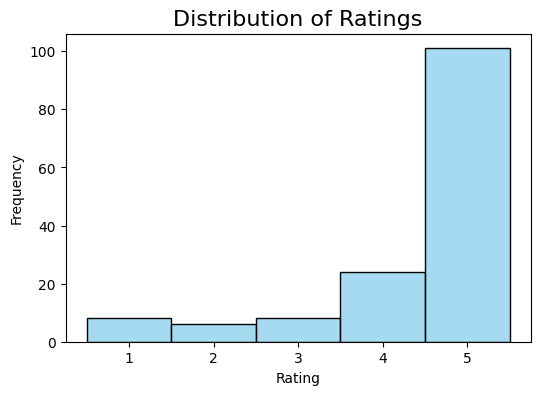

In [ ]:
# Histogram for Rating
plt.figure(figsize=(6, 4))
sns.histplot(df['rating'], bins=5, kde=False, color='skyblue', discrete=True)
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.show()


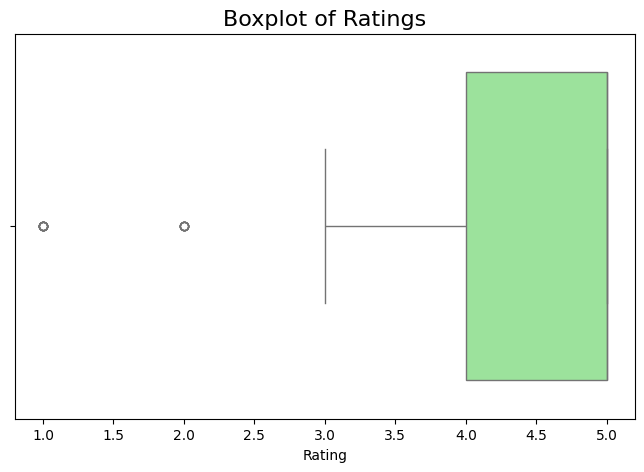

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['rating'], color='lightgreen')
plt.title('Boxplot of Ratings', fontsize=16)
plt.xlabel('Rating')
plt.show()

In [ ]:
# Key statistics
print("Rating Statistics:")
print(df['rating'].describe())

Rating Statistics:
count    147.000000
mean       4.387755
std        1.119252
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


In [ ]:
df['thumbs_up'].describe()

,thumbs_up
count,147.000000
mean,2.088435
std,3.831959
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,31.000000


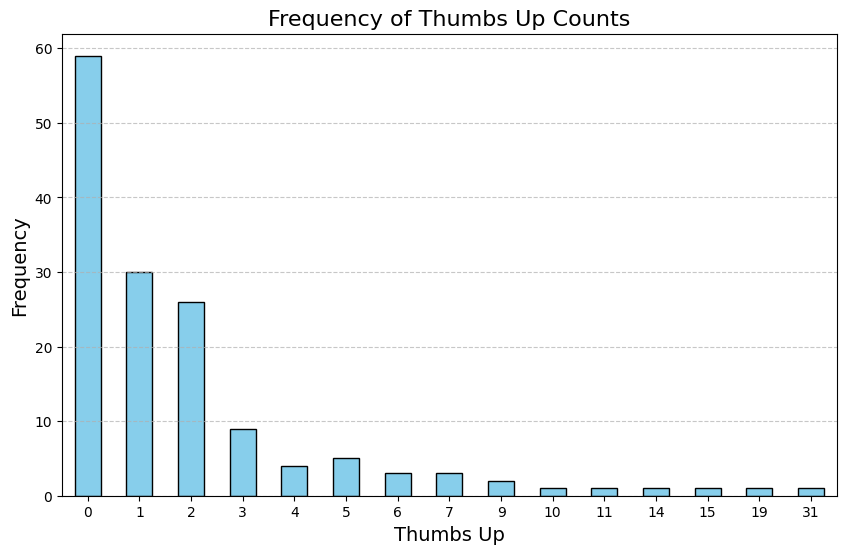

In [ ]:
# Count the frequency of each thumbs_up value
thumbs_up_counts = df['thumbs_up'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
thumbs_up_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Frequency of Thumbs Up Counts', fontsize=16)
plt.xlabel('Thumbs Up', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


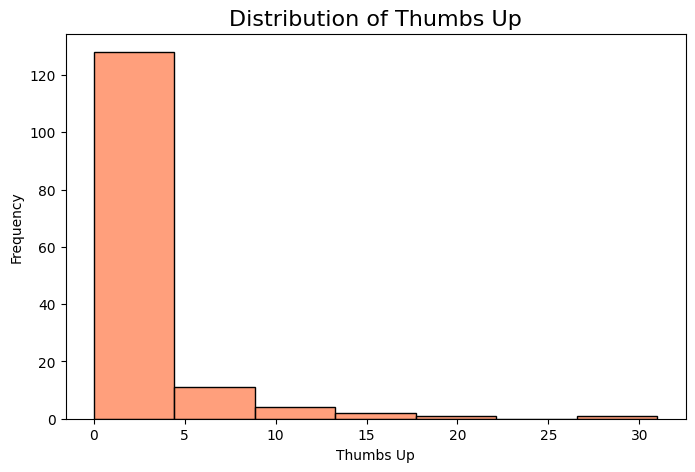

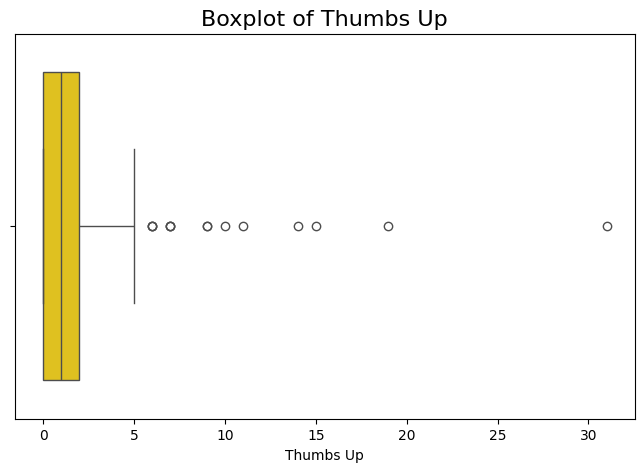

Thumbs Up Statistics:
count    147.000000
mean       2.088435
std        3.831959
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       31.000000
Name: thumbs_up, dtype: float64


In [ ]:
# Histogram for Thumbs Up
plt.figure(figsize=(8, 5))
sns.histplot(df['thumbs_up'], bins=7, kde=False, color='coral')
plt.title('Distribution of Thumbs Up', fontsize=16)
plt.xlabel('Thumbs Up')
plt.ylabel('Frequency')
plt.show()


print()
# Box Plot for Thumbs Up
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['thumbs_up'], color='gold')
plt.title('Boxplot of Thumbs Up', fontsize=16)
plt.xlabel('Thumbs Up')
plt.show()

# Key statistics
print("Thumbs Up Statistics:")
print(df['thumbs_up'].describe())


Total unique app versions: 18

Most frequent app versions:
 appVersion
18.0.0         55
16.0.2         19
17.0.0         14
23.12.04000    10
23.02.25000     9
Name: count, dtype: int64

Least frequent app versions:
 appVersion
23.08.27000    1
10.5.3         1
10.5.1         1
10.4.1         1
10.5.0         1
Name: count, dtype: int64


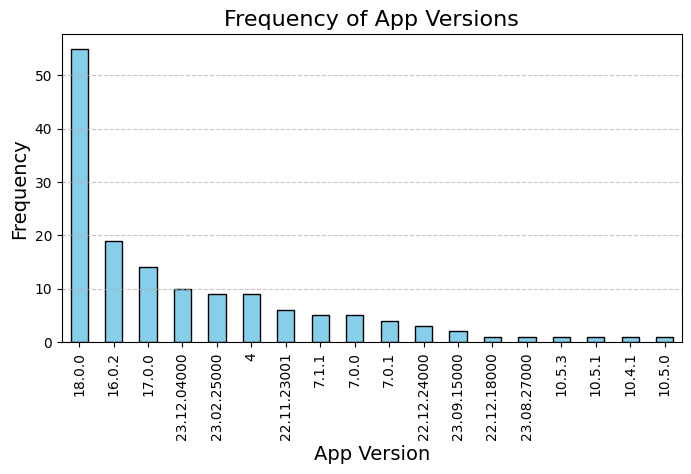

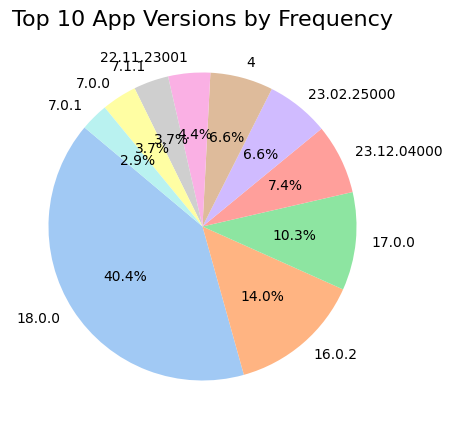

In [ ]:
# Frequency count of each app version
app_version_counts = df['appVersion'].value_counts()

# Display key statistics for app versions
print("Total unique app versions:", df['appVersion'].nunique())
print("\nMost frequent app versions:\n", app_version_counts.head())
print("\nLeast frequent app versions:\n", app_version_counts.tail())

# Bar Chart for appVersion frequency
plt.figure(figsize=(8, 4))
app_version_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Frequency of App Versions', fontsize=16)
plt.xlabel('App Version', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print()
print()

# Pie Chart for top 10 app versions
plt.figure(figsize=(5, 5))
app_version_counts.head(10).plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel', n_colors=10)
)

# Add title and legend
plt.title('Top 10 App Versions by Frequency', fontsize=16)
plt.ylabel('')  # Remove y-axis label for clarity
plt.show()


<ipython-input-33-ce13ceb33da7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Customer_Satisfaction'], palette='coolwarm')


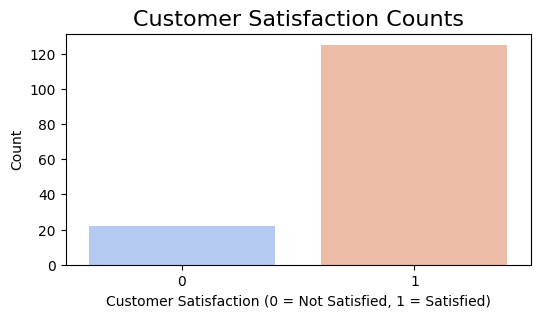

Customer Satisfaction Distribution (%):
Customer_Satisfaction
1    85.034014
0    14.965986
Name: proportion, dtype: float64


In [ ]:
# Bar chart for Customer Satisfaction
plt.figure(figsize=(6, 3))
sns.countplot(x=df['Customer_Satisfaction'], palette='coolwarm')
plt.title('Customer Satisfaction Counts', fontsize=16)
plt.xlabel('Customer Satisfaction (0 = Not Satisfied, 1 = Satisfied)')
plt.ylabel('Count')
plt.show()

# Satisfaction percentage
satisfaction_percentage = df['Customer_Satisfaction'].value_counts(normalize=True) * 100
print("Customer Satisfaction Distribution (%):")
print(satisfaction_percentage)

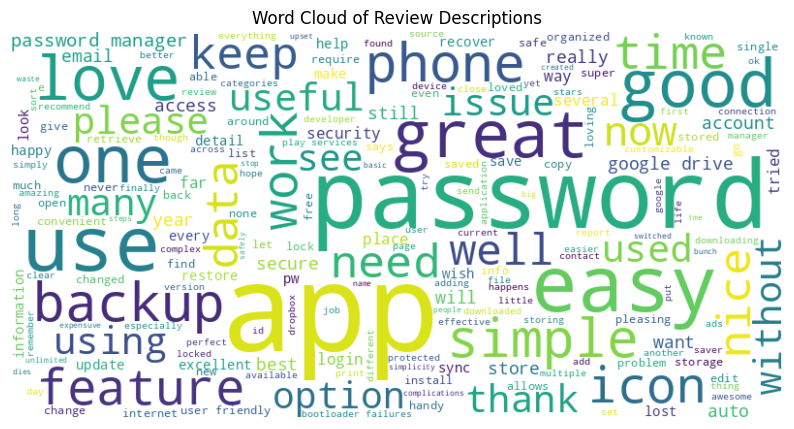

In [ ]:
from wordcloud import WordCloud
text = ' '.join(df['review_description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Descriptions')
plt.show()

<ipython-input-35-be311e37a048>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer_Satisfaction', y='rating', data=df, palette='coolwarm')


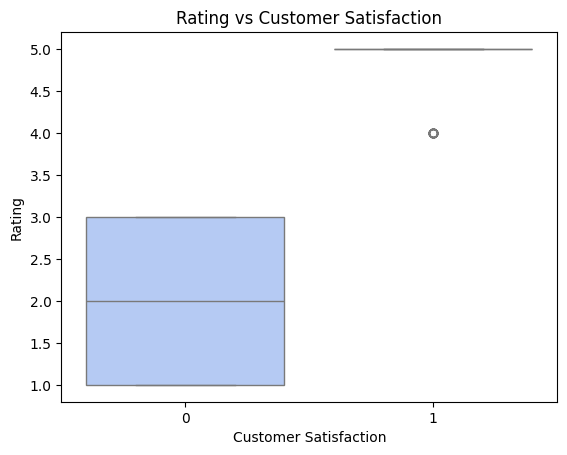

In [ ]:
sns.boxplot(x='Customer_Satisfaction', y='rating', data=df, palette='coolwarm')
plt.title('Rating vs Customer Satisfaction')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Rating')
plt.show()

<ipython-input-36-c5e53f9b39f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Customer_Satisfaction', y='thumbs_up', palette='Set2')


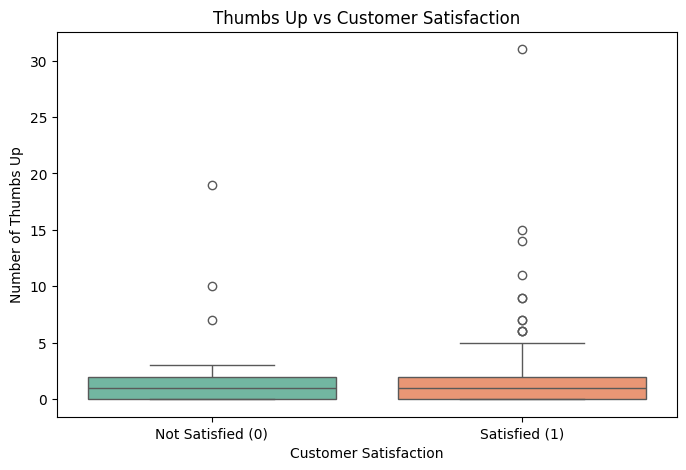

In [ ]:
# Box Plot for thumbs_up vs Customer_Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Customer_Satisfaction', y='thumbs_up', palette='Set2')
plt.title('Thumbs Up vs Customer Satisfaction')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Number of Thumbs Up')
plt.xticks([0, 1], ['Not Satisfied (0)', 'Satisfied (1)'])
plt.show()

<ipython-input-37-2982e8cbfdb9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Satisfaction', y='thumbs_up', data=avg_thumbs_up, palette='viridis')


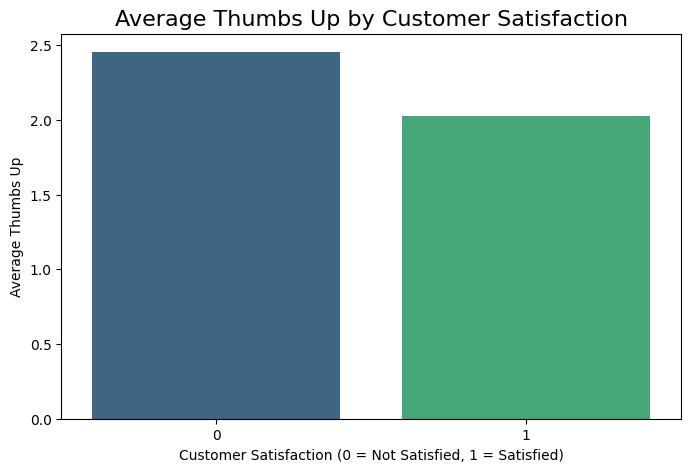

In [ ]:
# Bar chart of average Thumbs Up for Customer Satisfaction groups
avg_thumbs_up = df.groupby('Customer_Satisfaction')['thumbs_up'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Customer_Satisfaction', y='thumbs_up', data=avg_thumbs_up, palette='viridis')
plt.title('Average Thumbs Up by Customer Satisfaction', fontsize=16)
plt.xlabel('Customer Satisfaction (0 = Not Satisfied, 1 = Satisfied)')
plt.ylabel('Average Thumbs Up')
plt.show()

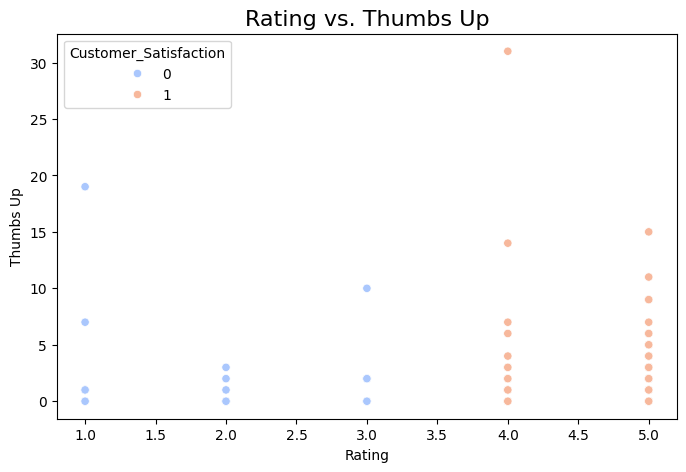

Correlation between Rating and Thumbs Up:
             rating  thumbs_up
rating     1.000000  -0.107063
thumbs_up -0.107063   1.000000


In [ ]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['rating'], y=df['thumbs_up'], hue=df['Customer_Satisfaction'], palette='coolwarm')
plt.title('Rating vs. Thumbs Up', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Thumbs Up')
plt.show()

# Correlation
correlation = df[['rating', 'thumbs_up']].corr()
print("Correlation between Rating and Thumbs Up:")
print(correlation)


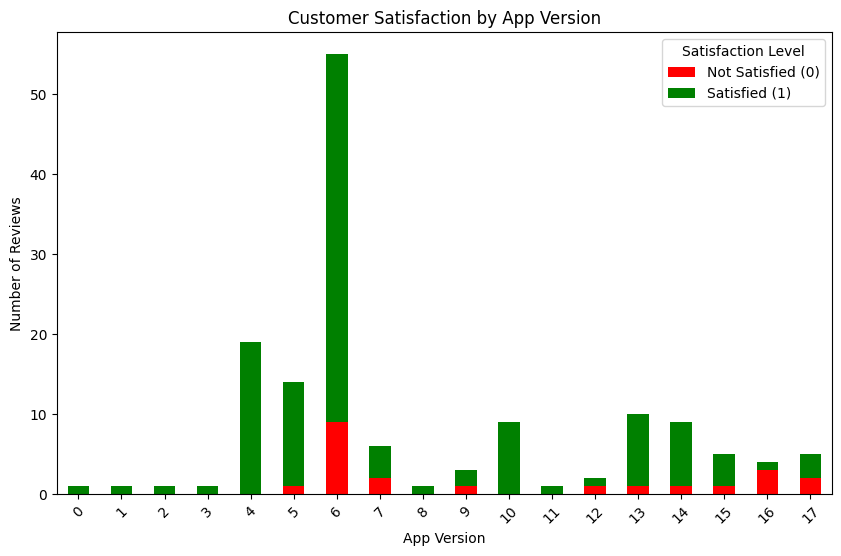

In [ ]:
# Frequency distribution of appVersion by Customer_Satisfaction
app_version_distribution = df.groupby(['appVersion_encoded', 'Customer_Satisfaction']).size().unstack()
app_version_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.title('Customer Satisfaction by App Version')
plt.xlabel('App Version')
plt.ylabel('Number of Reviews')
plt.legend(['Not Satisfied (0)', 'Satisfied (1)'], title='Satisfaction Level')
plt.xticks(rotation=45)
plt.show()

<ipython-input-40-6bf51a7d3a9f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='appVersion_encoded', y='rating', data=df, palette='pastel')


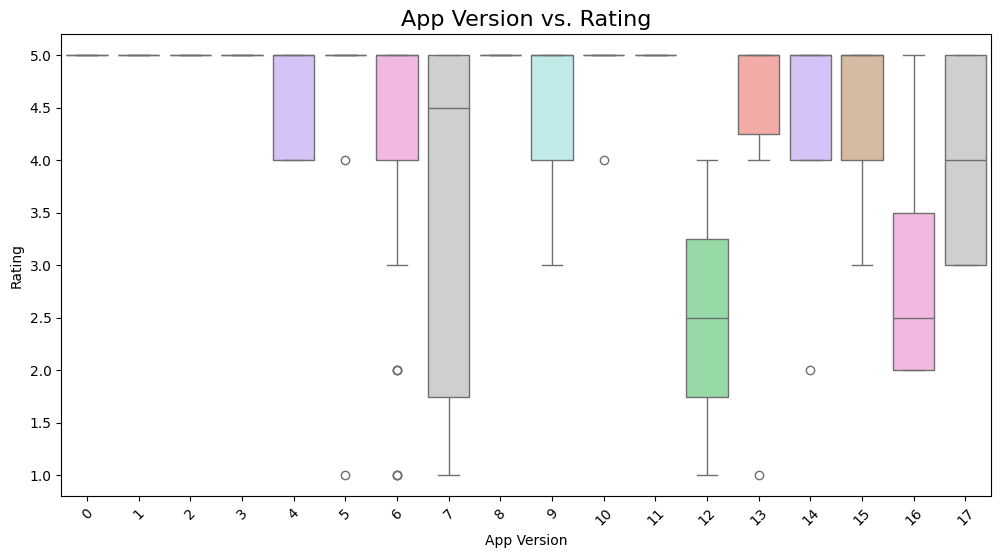

In [ ]:
# Box plot for App Version vs. Rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='appVersion_encoded', y='rating', data=df, palette='pastel')
plt.title('App Version vs. Rating', fontsize=16)
plt.xlabel('App Version')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


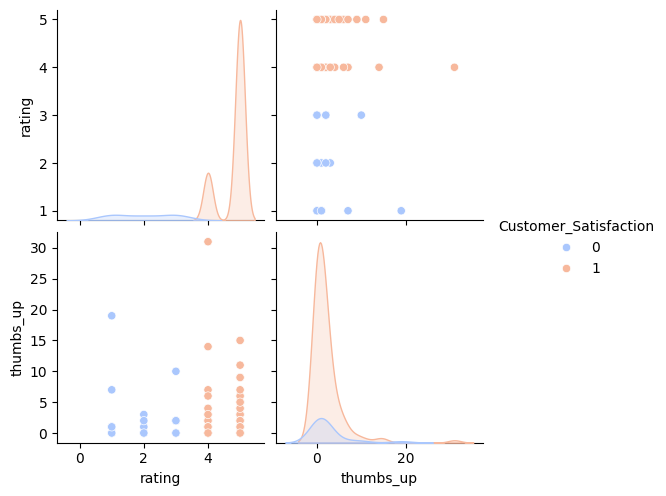

In [ ]:
# Pair plot for numerical features
sns.pairplot(df[['rating', 'thumbs_up', 'Customer_Satisfaction']], hue='Customer_Satisfaction', palette='coolwarm')
plt.show()

# Feature Selection

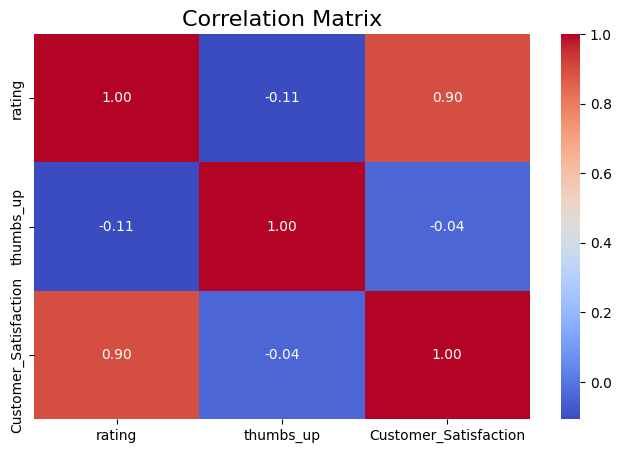

In [ ]:
# Correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(df[['rating', 'thumbs_up', 'Customer_Satisfaction']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [ ]:
# Group-by analysis for Customer Satisfaction
group_stats = df.groupby('Customer_Satisfaction').agg({
    'rating': ['mean', 'median', 'std'],
    'thumbs_up': ['mean', 'median', 'std']
}).reset_index()

group_stats.columns = ['Customer_Satisfaction', 'rating_Mean', 'rating_Median', 'rating_Std',
                       'ThumbsUp_Mean', 'ThumbsUp_Median', 'ThumbsUp_Std']
print("Grouped Statistics by Customer Satisfaction:")
print(group_stats)

Grouped Statistics by Customer Satisfaction:
   Customer_Satisfaction  rating_Mean  rating_Median  rating_Std  \
0                      0        2.000            2.0    0.872872   
1                      1        4.808            5.0    0.395458   

   ThumbsUp_Mean  ThumbsUp_Median  ThumbsUp_Std  
0       2.454545              1.0      4.426406  
1       2.024000              1.0      3.734028  


In [ ]:
# Group by appVersion and calculate statistics for Customer_Satisfaction
appVersion_summary = df.groupby('appVersion')['Customer_Satisfaction'].agg(['mean', 'median', 'count']).reset_index()

# Rename columns for clarity
appVersion_summary.columns = ['appVersion', 'Mean_Satisfaction', 'Median_Satisfaction', 'Count']

# Display the group-by summary
print(appVersion_summary)

     appVersion  Mean_Satisfaction  Median_Satisfaction  Count
0        10.4.1           1.000000                  1.0      1
1        10.5.0           1.000000                  1.0      1
2        10.5.1           1.000000                  1.0      1
3        10.5.3           1.000000                  1.0      1
4        16.0.2           1.000000                  1.0     19
5        17.0.0           0.928571                  1.0     14
6        18.0.0           0.836364                  1.0     55
7   22.11.23001           0.666667                  1.0      6
8   22.12.18000           1.000000                  1.0      1
9   22.12.24000           0.666667                  1.0      3
10  23.02.25000           1.000000                  1.0      9
11  23.08.27000           1.000000                  1.0      1
12  23.09.15000           0.500000                  0.5      2
13  23.12.04000           0.900000                  1.0     10
14            4           0.888889                  1.0

<ipython-input-45-f6bf75553e85>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=appVersion_summary, x='appVersion', y='Mean_Satisfaction', palette='viridis')


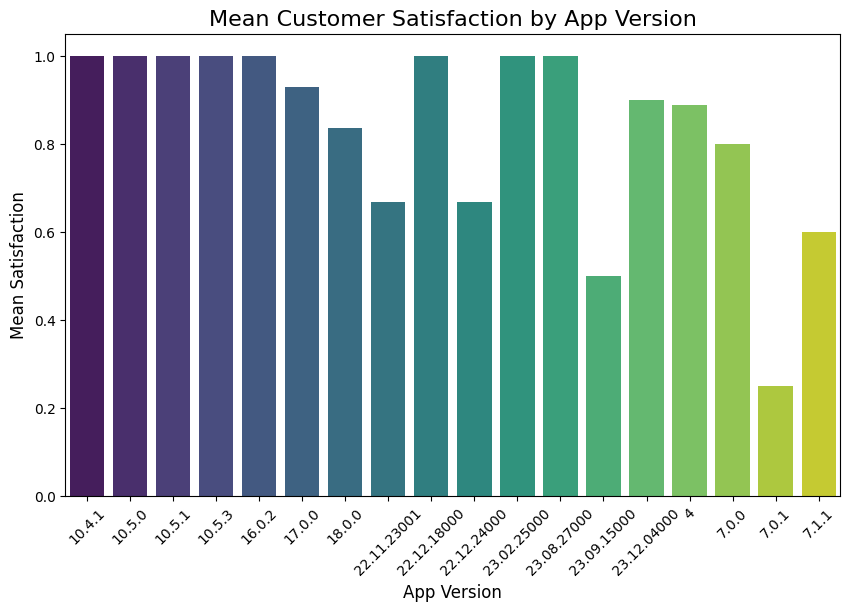

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of mean satisfaction
plt.figure(figsize=(10, 6))
sns.barplot(data=appVersion_summary, x='appVersion', y='Mean_Satisfaction', palette='viridis')
plt.title('Mean Customer Satisfaction by App Version', fontsize=16)
plt.xlabel('App Version', fontsize=12)
plt.ylabel('Mean Satisfaction', fontsize=12)
plt.xticks(rotation=45)  # Rotate appVersion labels for better readability
plt.show()
